# Exploratory Data Analysis

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ACER\AppData\Local\Temp\ipykernel_23112\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Reading the data
df = pd.read_csv('../../datasets/london_bikes.csv')

In [3]:
# Changing time to datetime type
df['time'] = pd.to_datetime(df['time'])

In [4]:
# set time to index
df.set_index('time', inplace=True)

In [5]:
df.head()

count  real_temp_C  temp_feels_like  humidity_percent  \
time                                                                         
2015-01-04 00:00:00    182          3.0              2.0             0.930   
2015-01-04 01:00:00    138          3.0              2.5             0.930   
2015-01-04 02:00:00    134          2.5              2.5             0.965   
2015-01-04 03:00:00     72          2.0              2.0             1.000   
2015-01-04 04:00:00     47          2.0              0.0             0.930   

                     windspeed_kmh        weather  is_holiday  is_weekend  \
time                                                                        
2015-01-04 00:00:00            6.0  Broken clouds         0.0         1.0   
2015-01-04 01:00:00            5.0          Clear         0.0         1.0   
2015-01-04 02:00:00            0.0          Clear         0.0         1.0   
2015-01-04 03:00:00            0.0          Clear         0.0         1.0   
2015-01-04 04:00:00            6.5          Clear         0.0         1.0   

                     season  year  month  day  
time                                           
2015-01-04 00:00:00  winter  2015      1    4  
2015-01-04 01:00:00  winter  2015      1    4  
2015-01-04 02:00:00  winter  2015      1    4  
2015-01-04 03:00:00  winter  2015      1    4  
2015-01-04 04:00:00  winter  2015      1    4

### Describing the data overall

In [6]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pertama tujuan, dataset seperti ini kita bisa lakukan untuk cari tau korelasi penjualan dan jumlah sebelah

In [7]:
%matplotlib inline

C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


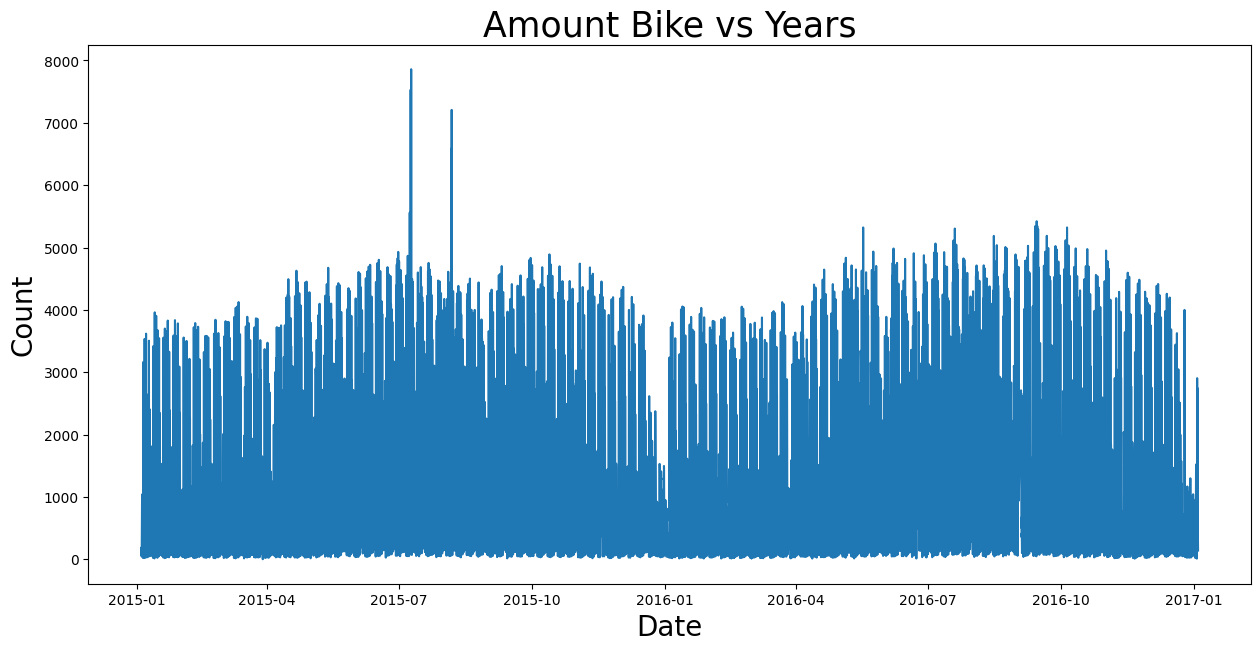

In [8]:
plt.figure(figsize=(15,7)) # menentukan ukuran window dari gambar
ax = sns.lineplot(x=df.index, y='count', data=df) 
ax.set_title('Amount Bike vs Years', fontsize=25)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
plt.show()

grafik di atas merupakan gambaran distribusi data dimana sumbu x merupakan tanggal dan sumbu y merupakan jumlah sepeda yang dirental. 

Grafik di atas datanya sedikit tidak enak dilihat di mata. Oleh karena itu, perlu dilakukan lagi beberapa analisis lainnya

C:\Users\ACER\AppData\Local\Temp\ipykernel_23112\2993033643.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df.resample('M').sum()
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


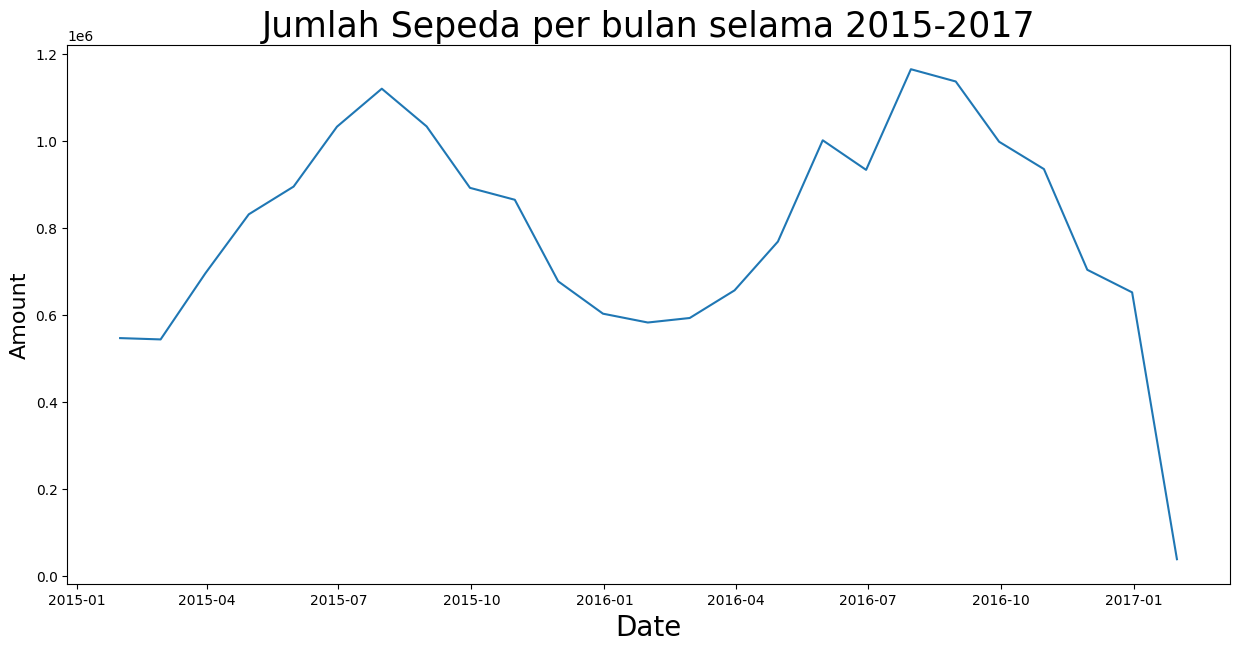

In [9]:
# Cari tau jumlah bike per bulan
df_month = df.resample('M').sum()
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=df_month, x=df_month.index, y='count')
ax.set_title('Jumlah Sepeda per bulan selama 2015-2017', fontsize=25)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Amount', fontsize=16)

plt.show()

In [30]:
df_month.head()

count  real_temp_C  temp_feels_like  humidity_percent  \
time                                                                 
2015-01-31  546639       4101.0           2255.5          510.0500   
2015-02-28  543594       3721.5           1868.0          519.5000   
2015-03-31  695934       6093.5           4558.5          518.3225   
2015-04-30  831582       7873.0           7112.5          484.6800   
2015-05-31  895413      10091.5           9803.5          479.3900   

            windspeed_kmh                                            weather  \
time                                                                           
2015-01-31       12502.00  Broken cloudsClearClearClearClearClearCloudyCl...   
2015-02-28        9873.50  Few cloudsSnowfallLight rainSnowfallLight rain...   
2015-03-31       12938.25  Broken cloudsBroken cloudsBroken cloudsFew clo...   
2015-04-30       10988.50  ClearClearClearClearClearClearClearClearClearF...   
2015-05-31       14268.50  ClearBroken cloudsFew cloudsClearClearClearCle...   

            is_holiday  is_weekend  \
time                                 
2015-01-31         0.0       192.0   
2015-02-28         0.0       192.0   
2015-03-31         0.0       215.0   
2015-04-30        48.0       191.0   
2015-05-31        48.0       240.0   

                                                       season     year  month  \
time                                                                            
2015-01-31  winterwinterwinterwinterwinterwinterwinterwint...  1352065    671   
2015-02-28  winterwinterwinterwinterwinterwinterwinterwint...  1352065   1342   
2015-03-31  springspringspringspringspringspringspringspri...  1489085   2217   
2015-04-30  springspringspringspringspringspringspringspri...  1448785   2876   
2015-05-31  springspringspringspringspringspringspringspri...  1499160   3720   

              day  
time               
2015-01-31  11753  
2015-02-28   9734  
2015-03-31  11751  
2015-04-30  11156  
2015-05-31  11904

In [31]:
df_month[df_month['count']==df_month['count'].max()]

count  real_temp_C  temp_feels_like  humidity_percent  \
time                                                                  
2016-07-31  1165527      14467.0          14453.5           487.195   

            windspeed_kmh                                            weather  \
time                                                                           
2016-07-31        11847.0  Broken cloudsBroken cloudsBroken cloudsBroken ...   

            is_holiday  is_weekend  \
time                                 
2016-07-31         0.0       239.0   

                                                       season     year  month  \
time                                                                            
2016-07-31  summersummersummersummersummersummersummersumm...  1493856   5187   

              day  
time               
2016-07-31  11817

In [32]:
df_month[df_month['count']==df_month['count'].min()]

count  real_temp_C  temp_feels_like  humidity_percent  \
time                                                                
2017-01-31  37680        339.0            114.0            60.715   

            windspeed_kmh                                            weather  \
time                                                                           
2017-01-31         1061.5  Broken cloudsBroken cloudsCloudyBroken cloudsL...   

            is_holiday  is_weekend  \
time                                 
2017-01-31        24.0        24.0   

                                                       season    year  month  \
time                                                                           
2017-01-31  winterwinterwinterwinterwinterwinterwinterwint...  145224     72   

            day  
time             
2017-01-31  144

Grafik di atas merupakan grafik jumlah sepeda yang dirental setiap bulannya dari tahun 2015 hingga 2017. Dimana peminjaman tertinggi berada dibulan Juli 2016, dimana peminjaman terendah ada di bulan Januari 2017

C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


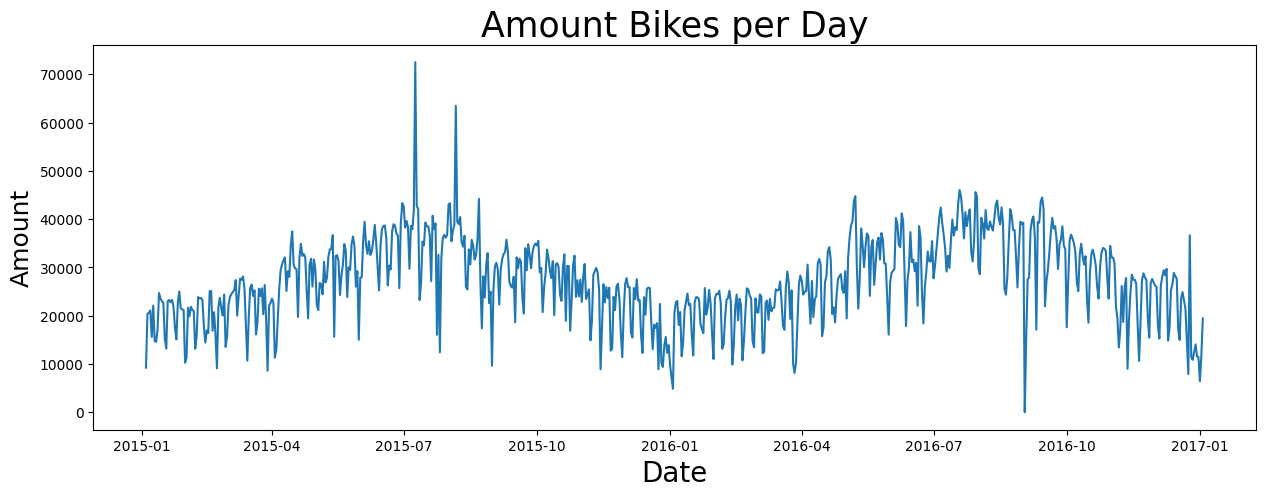

In [11]:
day_of_week = df.resample('D').sum()
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=day_of_week, x=day_of_week.index, y='count')
ax.set_title('Amount Bikes per Day', fontsize=25)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Amount', fontsize=18)
plt.show()

In [38]:
day_of_week.head(10)

count  real_temp_C  temp_feels_like  humidity_percent  \
time                                                                
2015-01-04   9234         59.5             15.5            22.625   
2015-01-05  20372        193.0            161.0            19.275   
2015-01-06  20613        188.5            128.0            18.935   
2015-01-07  21064        171.5            103.5            17.965   
2015-01-08  15601        234.0            187.0            19.035   
2015-01-09  22104        305.5            296.0            17.965   
2015-01-10  14709        251.5            209.0            15.870   
2015-01-11  14575        159.5             59.0            16.220   
2015-01-12  17199        267.0            234.0            18.380   
2015-01-13  24697        206.5            146.0            18.195   

            windspeed_kmh                                            weather  \
time                                                                           
2015-01-04          180.0  Broken cloudsClearClearClearClearClearCloudyCl...   
2015-01-05          212.5  CloudyCloudyCloudyCloudyCloudyCloudyBroken clo...   
2015-01-06          384.0  CloudyCloudyCloudyCloudyCloudyCloudyBroken clo...   
2015-01-07          454.5  ClearClearClearFew cloudsFew cloudsClearClearC...   
2015-01-08          491.5  CloudyBroken cloudsBroken cloudsBroken cloudsL...   
2015-01-09          790.0  Few cloudsLight rainLight rainBroken cloudsBro...   
2015-01-10          823.5  CloudyCloudyBroken cloudsBroken cloudsBroken c...   
2015-01-11          637.5  ClearClearClearFew cloudsClearClearClearClearC...   
2015-01-12          676.5  Few cloudsCloudyCloudyBroken cloudsBroken clou...   
2015-01-13          509.0  Light rainLight rainLight rainLight rainLight ...   

            is_holiday  is_weekend  \
time                                 
2015-01-04         0.0        24.0   
2015-01-05         0.0         0.0   
2015-01-06         0.0         0.0   
2015-01-07         0.0         0.0   
2015-01-08         0.0         0.0   
2015-01-09         0.0         0.0   
2015-01-10         0.0        24.0   
2015-01-11         0.0        24.0   
2015-01-12         0.0         0.0   
2015-01-13         0.0         0.0   

                                                       season   year  month  \
time                                                                          
2015-01-04  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   
2015-01-05  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   
2015-01-06  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   
2015-01-07  winterwinterwinterwinterwinterwinterwinterwint...  46345     23   
2015-01-08  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   
2015-01-09  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   
2015-01-10  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   
2015-01-11  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   
2015-01-12  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   
2015-01-13  winterwinterwinterwinterwinterwinterwinterwint...  48360     24   

            day  
time             
2015-01-04   96  
2015-01-05  120  
2015-01-06  144  
2015-01-07  161  
2015-01-08  192  
2015-01-09  216  
2015-01-10  240  
2015-01-11  264  
2015-01-12  288  
2015-01-13  312

In [36]:
day_of_week['count'].mean()

27231.151846785226

Grafik di atas merupakan grafik peminjaman sepeda per harinya dari tanggal 4 Januari 2015 hingga 3 Januari 2017. Dimana rata-rata penjualan dalam rentang tersebut adlaah 27.231

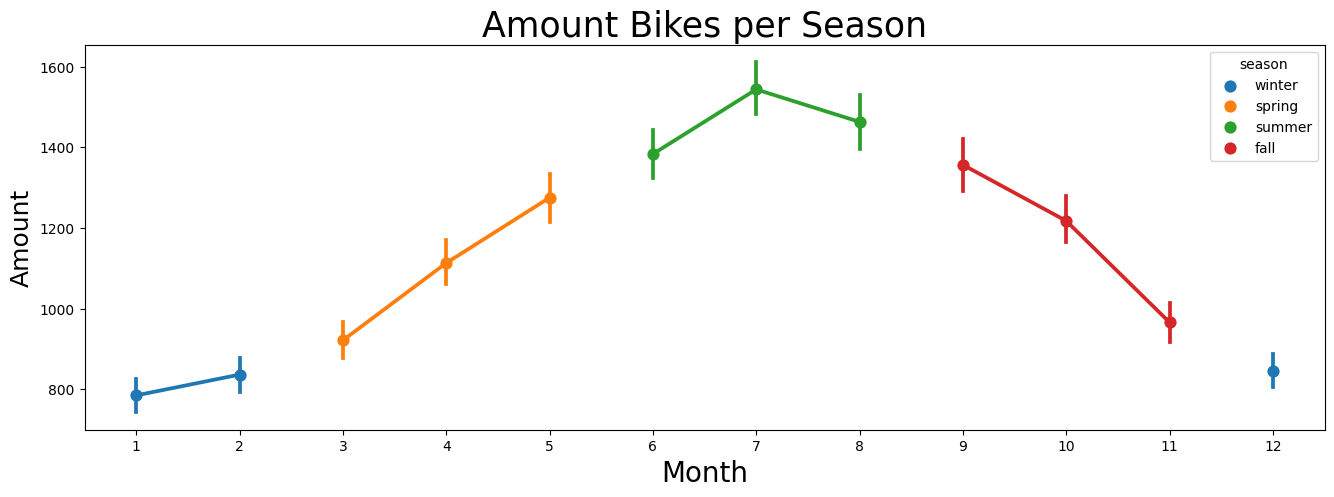

In [12]:
plt.figure(figsize=(16,5))
ax = sns.pointplot(data=df, x='month', y='count', hue='season')
ax.set_title('Amount Bikes per Season', fontsize=25)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Amount', fontsize=18)
plt.show()


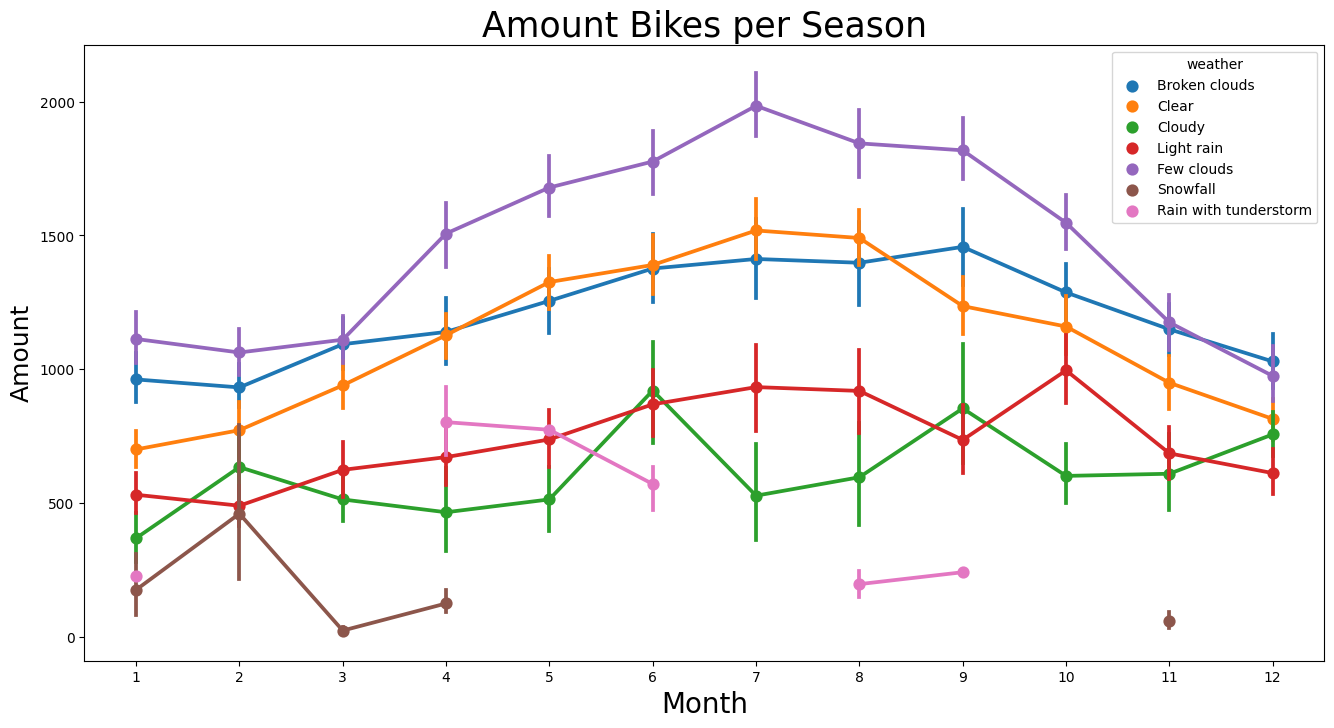

In [40]:
plt.figure(figsize=(16,8))
ax = sns.pointplot(data=df, x='month', y='count', hue='weather')
ax.set_title('Amount Bikes per Season', fontsize=25)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Amount', fontsize=18)
plt.show()

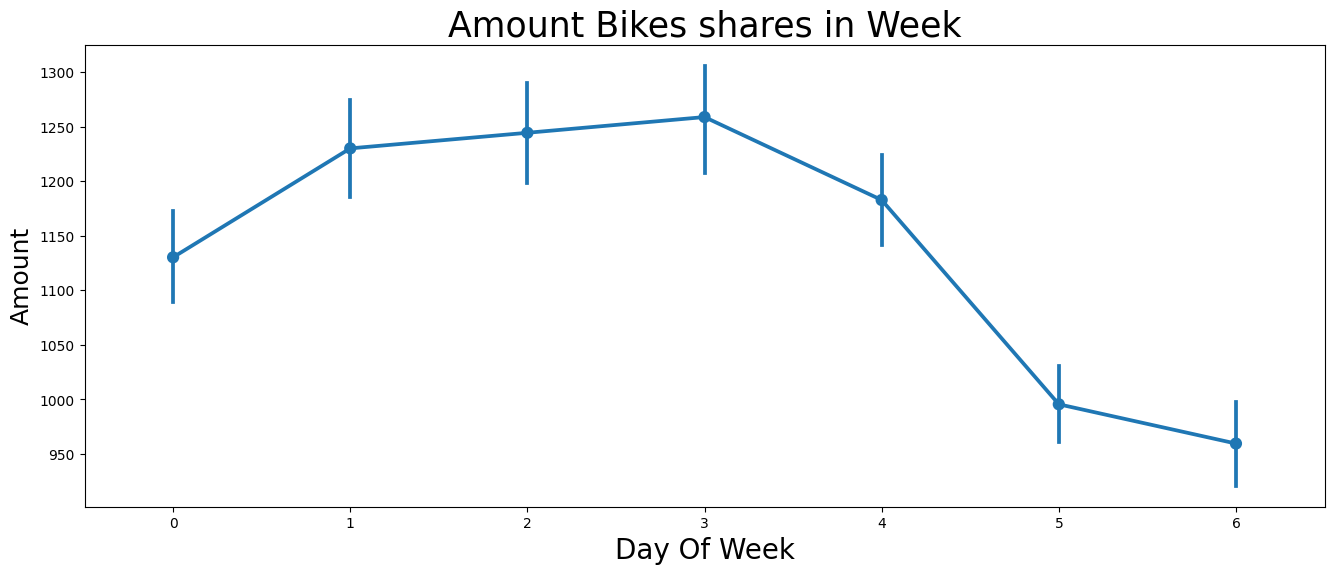

In [13]:
plt.figure(figsize=(16,6))
ax = sns.pointplot(data=df, x=df.index.dayofweek, y='count')
ax.set_title('Amount Bikes shares in Week', fontsize=25)
ax.set_xlabel('Day Of Week', fontsize=20)
ax.set_ylabel('Amount', fontsize=18)
plt.show()

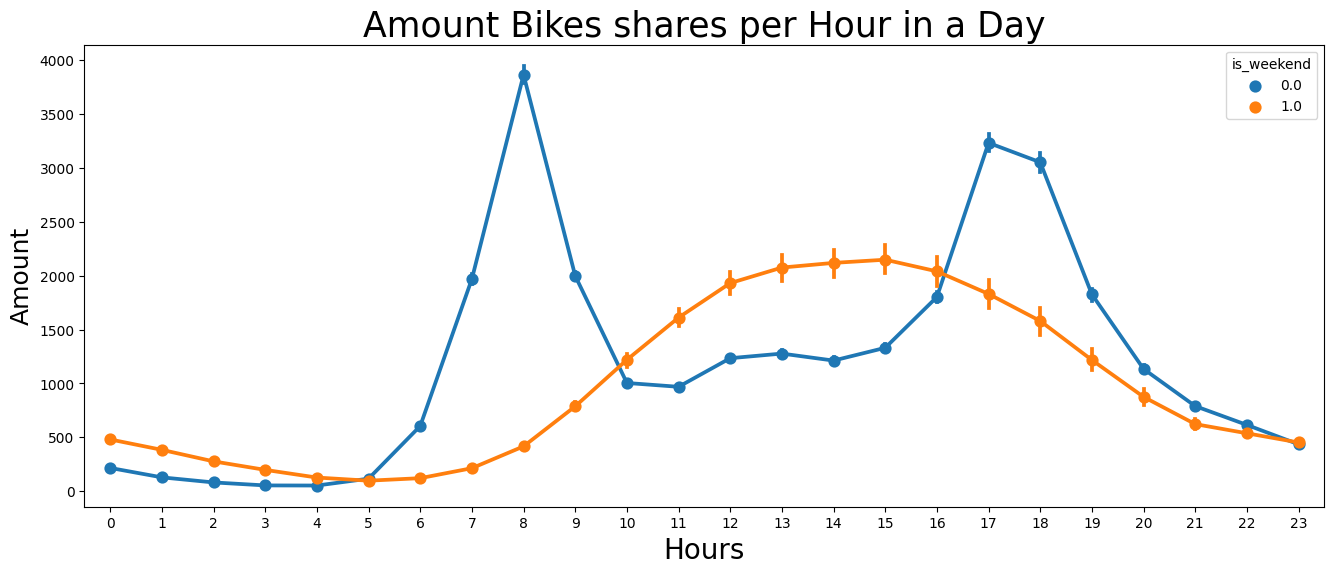

In [14]:
plt.figure(figsize=(16,6))
ax = sns.pointplot(data=df, x=df.index.hour, y='count', hue='is_weekend')
ax.set_title('Amount Bikes shares per Hour in a Day', fontsize=25)
ax.set_xlabel('Hours', fontsize=20)
ax.set_ylabel('Amount', fontsize=18)
plt.show()

<AxesSubplot: >

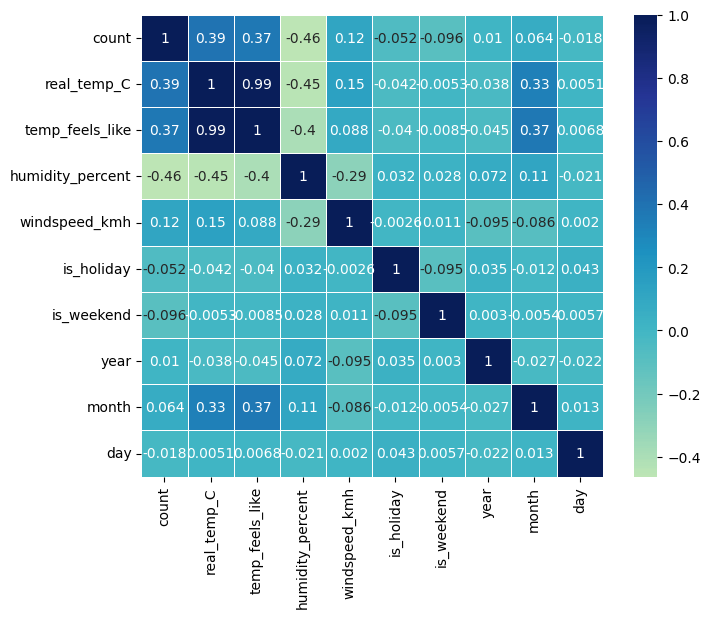

In [15]:
plt.figure(figsize=(8,6))
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, cmap="YlGnBu",square=True,linewidths=.5,center=0, annot=True)